In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

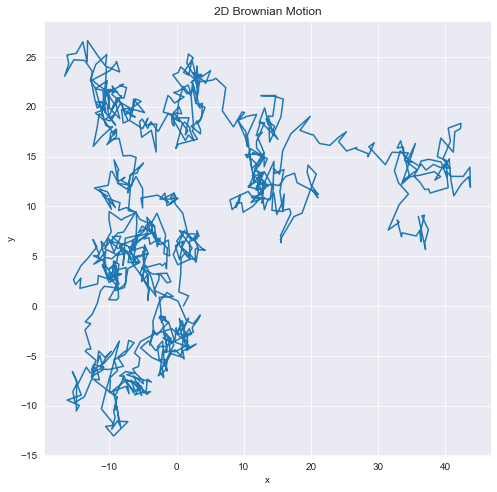

In [7]:
import random

steps = 1000
random.seed(42)

x, y = np.cumsum(np.random.randn(steps)), np.cumsum(np.random.randn(steps))

points = 20
ip = lambda x, steps, points: np.interp(np.arange(steps*points), np.arange(steps)*points, x)

X, Y = ip(x, steps, points), ip(y, steps, points)
fig, ax = plt.subplots(1, 1, figsize = (8, 8))

ax.set_title('2D Brownian Motion')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.plot(X, Y, markersize = 1)

In [3]:
class Brownian():
    """
    A Brownian motion class constructor
    """
    def __init__(self,x0=0):
        """
        Init class
        """
        assert (type(x0)==float or type(x0)==int or x0 is None), "Expect a float or None for the initial value"
        
        self.x0 = float(x0)
    
    def gen_random_walk(self,n_step=100):
        """
        Generate motion by random walk
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        # Warning about the small number of steps
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution with probability 1/2
            yi = np.random.choice([1,-1])
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w
    
    def gen_normal(self,n_step=100):
        """
        Generate motion by drawing from the Normal distribution
        
        Arguments:
            n_step: Number of steps
            
        Returns:
            A NumPy array with `n_steps` points
        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence!")
        
        w = np.ones(n_step)*self.x0
        
        for i in range(1,n_step):
            # Sampling from the Normal distribution
            yi = np.random.normal()
            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))
        
        return w

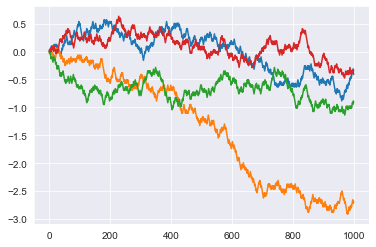

In [4]:
#Random Walk (initial value = 0)

b = Brownian()
for i in range(4):
    plt.plot(b.gen_random_walk(1000))
plt.show()


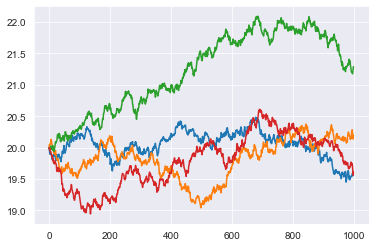

In [5]:
#Normal distribution (initial value = 20)

b = Brownian(20)
for i in range(4):
    plt.plot(b.gen_normal(1000))
plt.show()

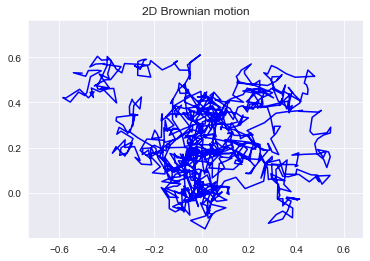

In [6]:
b1 = Brownian()
b2 = Brownian()

x = b1.gen_normal(1000)
y = b2.gen_normal(1000)

plt.plot(x,y,c='b')
xmax,xmin,ymax,ymin = x.max(),x.min(),y.max(),y.min()
scale_factor = 1.25
xmax,xmin,ymax,ymin = xmax*scale_factor,xmin*scale_factor,ymax*scale_factor,ymin*scale_factor
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)
plt.title('2D Brownian motion')
plt.show()